In [70]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer,load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pylab as plt

# SVC

## 1st Example: breast cancer data

In [55]:
#load breast cancer data
BreastData = load_breast_cancer()
#X Data
X = BreastData.data
#y Data
y = BreastData.target

In [56]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [57]:
#Applying SVC Model
'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'poly',# it can be also linear,poly,sigmoid,precomputed
               max_iter= 1000, C=1)
SVCModel.fit(X_train, y_train)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=1000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
#Calculating Prediction
y_pred = SVCModel.predict(X_test)


In [59]:
#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))

SVCModel Train Score is :  0.8923884514435696
SVCModel Test Score is :  0.9095744680851063


Confusion Matrix is : 
 [[ 56  12]
 [  5 115]]


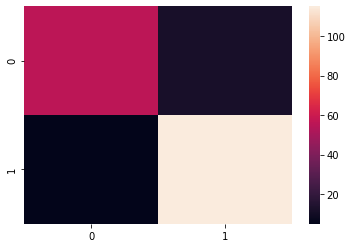

In [60]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM)

## 2nd Example: Hear data

In [61]:
# Importing the dataset
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]


In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


* Because we work on Classification data, we maka a Scalig after split data and scale the train and test data of X

In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [64]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=10, max_iter=1000)
classifier.fit(X_train, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [66]:
#Calculating Details
print('SVC Train Score is : ' , classifier.score(X_train, y_train))
print('SVC Test Score is : ' , classifier.score(X_test, y_test))


SVC Train Score is :  0.9823788546255506
SVC Test Score is :  0.8552631578947368


[[28  5]
 [ 6 37]]


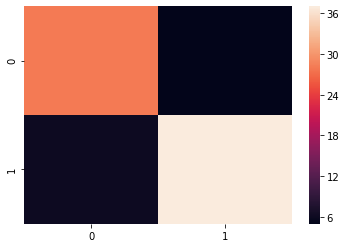

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm)


## 3rd Example: comparison between SVC& Logistic Regression

In [81]:
#load iris data
IrisData = load_iris()

#X Data
X = IrisData.data

#y Data
y = IrisData.target


In [82]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


### Applying `LogisticRegression Model`

In [83]:
LogisticRegressionModel = LinearRegression()
LogisticRegressionModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))


LogisticRegressionModel Train Score is :  0.9234900069456211
LogisticRegressionModel Test Score is :  0.9347660483952532


In [88]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)


Confusion Matrix is : 
 [[18  0  0]
 [ 0 15  0]
 [ 0  1 16]]


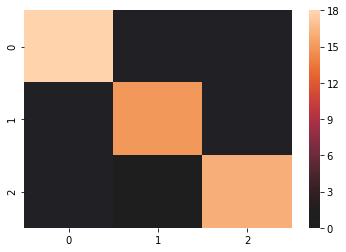

In [92]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)


### Applying `SVC`

In [94]:
SVCModel = SVC(kernel='rbf', C = 10, max_iter = 1000)
SVCModel.fit(X_train, y_train)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [95]:
#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))


SVCModel Train Score is :  0.98
SVCModel Test Score is :  1.0


In [96]:
#Calculating Prediction
y_pred = SVCModel.predict(X_test)


Confusion Matrix is : 
 [[18  0  0]
 [ 0 15  0]
 [ 0  0 17]]


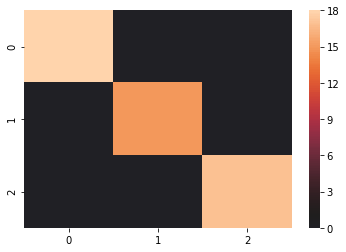

In [97]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()